In [26]:
# Import all necessity functions for Machine Learning #####
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score

#####Import the dataset

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#####Convert this target class into Numerical

In [3]:
df.loc[:, 'Species'] = df.loc[:, 'Species'].\
      map({value: index for index, value\
      in enumerate(df.loc[:, 'Species'].value_counts().index)})

df.head()

<ipython-input-3-cadeae4ab286>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Species'] = df.loc[:, 'Species'].\


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#####Scaling the dataset

In [4]:
StandardScaler = StandardScaler()
independent = StandardScaler.fit_transform(df.iloc[:, :-1].values)
independent = pd.DataFrame(independent, columns = df.columns[:-1])
df = pd.concat([independent, df.iloc[:, -1]], axis = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,0


#####Drop the Id column

In [5]:
try:
  df.drop(['Id'], axis = 1, inplace = True)
except Exception as e:
  print(e.with_traceback)
else:
  print("Id column is deleted !!!")

Id column is deleted !!!


#####Split the dataset with train and test

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("The shape of X_train is # {} ".format(X_train.shape),'\n')
print("The shape of X_test  is # {} ".format(X_test .shape),'\n')
print("The shape of y_train is # {} ".format(y_train.shape),'\n')
print("The shape of y_test  is # {} ".format(y_test.shape))

The shape of X_train is # (112, 4)  

The shape of X_test  is # (38, 4)  

The shape of y_train is # (112,)  

The shape of y_test  is # (38,) 


#####Initiate the DataLoader with batch_size :: 16

In [7]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

""""Convert X_train and X_test into torch Float"""
X_train = torch.tensor(data = X_train, dtype = torch.float32)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)

"""Initiate the DataLoader"""
loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = 32, shuffle = True)
print("The batch size of this loader # {} ".format(loader.batch_size))

The batch size of this loader # 32 


In [8]:
data, labels = next(iter(loader))
print("The shape of singular batch size of training data # {} ".format(data.shape))
print("The shape of singular batch size of label data # {} ".format(labels.shape))

The shape of singular batch size of training data # torch.Size([32, 4]) 
The shape of singular batch size of label data # torch.Size([32]) 


#####Initialize the loss function & optimizer

In [9]:
# LEARNING_RATE = 0.001
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

#####Model Building using Sequential

In [10]:
"""
    Create a class named IrisClassifier that will take TWO parameters
    1. input_dimension  : This will determine how many features that I am going to train.
    2. output_dimension : This will determine how many output that I intend to
"""
class IrisClassifier(nn.Module):
  def __init__(self, input_dimension = None, output_dimension = None):
    # Call the super class that will inherit all the methods that would be needed
    super().__init__()
    """
        Create the First Layer
        1. in_features : that would be the input_dimension
        2. out_features: that would be the neurons that will be passed
        3. Activation  : ReLU
        4. weight init : he_normal
        5. Dropout rate: 0.5
    """
    self.FirstLayer = nn.Sequential(
        # Create the first hidden layer
        nn.Linear(in_features = input_dimension, out_features = 64),
        # Initialize the activation function
        nn.ReLU(),
        # Initialize the dropout ration with 0.3
        nn.Dropout(p = 0.5)
    )

    """
        Create the Second Layer
        1. in_features : that would be the input_dimension
        2. out_features: that would be the neurons that will be passed
        3. Activation  : ReLU
        4. weight init : he_normal
        5. Dropout rate: 0.6
    """
    self.SecondLayer = nn.Sequential(
        # Create the first hidden layer
        nn.Linear(in_features = 64, out_features = 32),
        # Initialize the activation function
        nn.ReLU(),
        # Initialize the dropout ration with 0.3
        nn.Dropout(p = 0.6)
    )

    """
        Create the Output Layer
        1. in_features : that would be the input_dimension
        2. out_features: that would be the neurons that will be passed
        3. Activation  : Softmax
        4. weight init : glorot_uniform
    """
    self.OutputLayer = nn.Sequential(
        # Create the first hidden layer
        nn.Linear(in_features = 32, out_features = output_dimension),
        # Initialize the activation function
        nn.Softmax()
    )

  def forward(self, x):
    # For the First Layer
    x = self.FirstLayer(x)

    # For the Second Layer
    x = self.SecondLayer(x)

    # For the Output Layer
    x = self.OutputLayer(x)

    return x

In [11]:
# Call the IrisClassifier model
try:
  model = IrisClassifier(input_dimension = X_train.shape[1], output_dimension = len(np.unique(y_test)))
except Exception as e:
  print(e.with_traceback)
else:
  print(model.parameters)

<bound method Module.parameters of IrisClassifier(
  (FirstLayer): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (SecondLayer): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
  )
  (OutputLayer): Sequential(
    (0): Linear(in_features=32, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)>


#GPU Connect

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
device

device(type='cuda')

In [14]:
# Display the model
summary(model = model.to(device), input_size = X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 112, 64]             320
              ReLU-2              [-1, 112, 64]               0
           Dropout-3              [-1, 112, 64]               0
            Linear-4              [-1, 112, 32]           2,080
              ReLU-5              [-1, 112, 32]               0
           Dropout-6              [-1, 112, 32]               0
            Linear-7               [-1, 112, 3]              99
           Softmax-8               [-1, 112, 3]               0
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.25
Params size (MB): 0.01
Estimated Total Size (MB): 0.26
----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [15]:
LEARNING_RATE = 0.01
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

###

In [16]:
optimizer, loss_function

(Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ),
 CrossEntropyLoss())

In [17]:
next(iter(model.parameters()))

Parameter containing:
tensor([[ 0.3043,  0.1389,  0.3442, -0.2007],
        [-0.1466, -0.4842,  0.4583, -0.4807],
        [ 0.0263,  0.4941,  0.2787, -0.1545],
        [ 0.1831, -0.3804,  0.3254,  0.3530],
        [ 0.2945, -0.4491,  0.2180, -0.3944],
        [ 0.1569, -0.1408, -0.3972,  0.0211],
        [-0.1059, -0.1074,  0.4653,  0.2371],
        [-0.2546,  0.0021,  0.4338, -0.0618],
        [-0.1619,  0.1629,  0.0657, -0.2663],
        [ 0.1359, -0.2051,  0.4008, -0.3585],
        [-0.2288, -0.3674,  0.3531,  0.0706],
        [ 0.3963,  0.3008, -0.0806, -0.4845],
        [ 0.4347,  0.3648,  0.3142, -0.0693],
        [ 0.0373,  0.1903,  0.3458,  0.3467],
        [-0.4352, -0.3405, -0.1079, -0.0135],
        [ 0.3983, -0.4364, -0.3498,  0.0031],
        [-0.0349,  0.0308, -0.1714,  0.2048],
        [-0.3480, -0.4316,  0.3230, -0.0138],
        [-0.0855,  0.1425,  0.3176,  0.1894],
        [ 0.1637, -0.2390, -0.2488,  0.1890],
        [ 0.0705, -0.3595,  0.1647,  0.1332],
        [ 0.

In [18]:
model.state_dict()

OrderedDict([('FirstLayer.0.weight',
              tensor([[ 0.3043,  0.1389,  0.3442, -0.2007],
                      [-0.1466, -0.4842,  0.4583, -0.4807],
                      [ 0.0263,  0.4941,  0.2787, -0.1545],
                      [ 0.1831, -0.3804,  0.3254,  0.3530],
                      [ 0.2945, -0.4491,  0.2180, -0.3944],
                      [ 0.1569, -0.1408, -0.3972,  0.0211],
                      [-0.1059, -0.1074,  0.4653,  0.2371],
                      [-0.2546,  0.0021,  0.4338, -0.0618],
                      [-0.1619,  0.1629,  0.0657, -0.2663],
                      [ 0.1359, -0.2051,  0.4008, -0.3585],
                      [-0.2288, -0.3674,  0.3531,  0.0706],
                      [ 0.3963,  0.3008, -0.0806, -0.4845],
                      [ 0.4347,  0.3648,  0.3142, -0.0693],
                      [ 0.0373,  0.1903,  0.3458,  0.3467],
                      [-0.4352, -0.3405, -0.1079, -0.0135],
                      [ 0.3983, -0.4364, -0.3498,  0.0031],
   

#####Do the training

In [19]:
BATCH_SIZE = 16
train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

In [28]:
model.to(device)

IrisClassifier(
  (FirstLayer): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (SecondLayer): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
  )
  (OutputLayer): Sequential(
    (0): Linear(in_features=32, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

#####Ignore the warning

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
EPOCHS = 100
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
TRAIN_LOSS = []
VAL_LOSS   = []
TRAIN_ACCURACY = []
VAL_ACCURACY   = []

########################
#       Training       #
########################

# train the model
model.train()
# Run a loop with respect to defined Epoch
for epoch in range(EPOCHS):
  """
      1. Extract the data(X_batch), label(y_batch) from the `train_loader`
      2. Pass X_batch as a training data into the model and do the prediction
      3. Compute the Loss Function
      4. Store computed loss into TRAIN_LOSS
  """
  for (X_batch, y_batch) in train_loader:
    """
        GPU initialize in data and label with respect to X_batch and y_batch
    """

    # Do the Initialize GPU with X_batch
    X_batch = X_batch.to(device)
    # Do the Initialize GPU with y_batch
    y_batch = y_batch.to(device)

    # Do the prediction
    train_prediction = model(X_batch)
    # Compute the loss with the predicted and orginal
    train_loss = loss_function(train_prediction, y_batch)
    """
        1. Initiate the Optimizer
        2. Do the backward propagation with respect to train_loss
        3. Do the step with optimizer
    """
    # Initialize the optimizer
    optimizer.zero_grad()
    # Do back propagation
    train_loss.backward()
    # Do the step with respect to optimizer
    optimizer.step()

  ########################
  # Compute the Accuracy #
  ########################

  # Do the prediction of training
  train_predicted = torch.argmax(train_prediction, dim = 1)
  # Append the train accuracy
  TRAIN_ACCURACY.append(accuracy_score(train_predicted.cpu(), y_batch.cpu()))
  # Append the train loss
  history['accuracy'].append(accuracy_score(train_predicted.cpu(), y_batch.cpu()))
  with torch.no_grad():
    # Append the train loss
    TRAIN_LOSS.append(train_loss.item())
    # Append the train loss into the history
    history['loss'].append(train_loss.item())

  ########################
  #       Testing        #
  ########################

  """
      1. Extract the data(val_batch), label(val_batch) from the `test_loader`
      2. Pass val_batch as a training data into the model and do the prediction
      3. Compute the Loss Function
      4. Store computed loss into VAL_LOSS & VAL_ACCURACY
  """
  # Run a loop with respect to test_loader
  for (val_data, val_label) in test_loader:
    """
        GPU Initialize with respect to val_data, val_label
    """

    # Do the Initialize GPU with val_data
    val_data = val_data.to(device)
    # Do the Initialize GPU with val_label
    val_label = val_label.to(device)

    # Do the prediction
    test_prediction = model(val_data)
    # Compute the loss
    test_loss = loss_function(test_prediction, val_label)

  ##########################
  #  Compute the Accuracy  #
  ##########################

  # Append the test loss
  with torch.no_grad():
    VAL_LOSS.append(test_loss.item())
    history['val_loss'].append(test_loss.item())
    # Compute the accuracy
    test_predicted = torch.argmax(test_prediction, dim = 1)
    # Append the accuracy of testing data
    VAL_ACCURACY.append(accuracy_score(test_predicted.cpu(), val_label.cpu()))
    history['val_accuracy'].append(accuracy_score(test_predicted.cpu(), val_label.cpu()))

  #########################
  #        Display        #
  #########################

  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))
  print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {} ".format(train_loader.batch_size,\
                                                                                                              train_loader.batch_size,\
                                                                                                              np.array(train_loss.item()).mean(),
                                                                                                              accuracy_score(train_predicted.cpu(), y_batch.cpu()),\
                                                                                                              np.array(test_loss.item()).mean(),\
                                                                                                              accuracy_score(test_predicted.cpu(), val_label.cpu())))

Epoch 1/100 
16/16 [=========================] loss: 0.551636278629303 - accuracy: 1.0 - val_loss: 0.5515057444572449 - val_accuracy: 1.0 
Epoch 2/100 
16/16 [=========================] loss: 0.56097412109375 - accuracy: 1.0 - val_loss: 0.5526416897773743 - val_accuracy: 1.0 
Epoch 3/100 
16/16 [=========================] loss: 0.5515031218528748 - accuracy: 1.0 - val_loss: 0.6598098874092102 - val_accuracy: 0.8333333333333334 
Epoch 4/100 
16/16 [=========================] loss: 0.5515528321266174 - accuracy: 1.0 - val_loss: 0.730879008769989 - val_accuracy: 0.8333333333333334 
Epoch 5/100 
16/16 [=========================] loss: 0.6139188408851624 - accuracy: 0.9375 - val_loss: 0.5600662231445312 - val_accuracy: 1.0 
Epoch 6/100 
16/16 [=========================] loss: 0.7229887843132019 - accuracy: 0.8125 - val_loss: 0.6522335410118103 - val_accuracy: 0.8333333333333334 
Epoch 7/100 
16/16 [=========================] loss: 0.6407696008682251 - accuracy: 0.875 - val_loss: 0.551657915

#####Do the evaluation

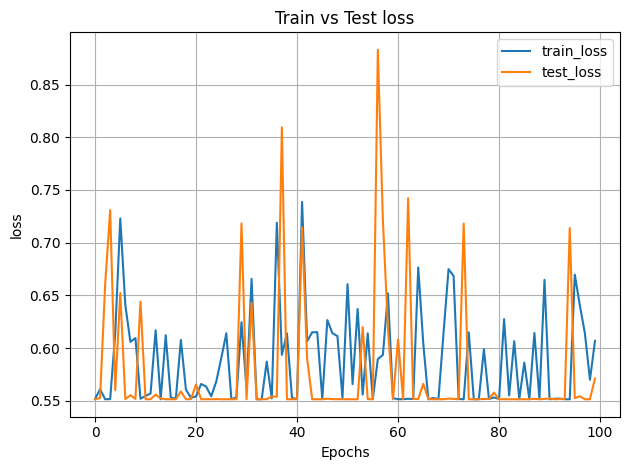

In [36]:
plt.title('Train vs Test loss')
plt.plot(history['loss'], label = 'train_loss')
plt.plot(history['val_loss'], label = 'test_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.tight_layout()
plt.grid(True)
plt.show()

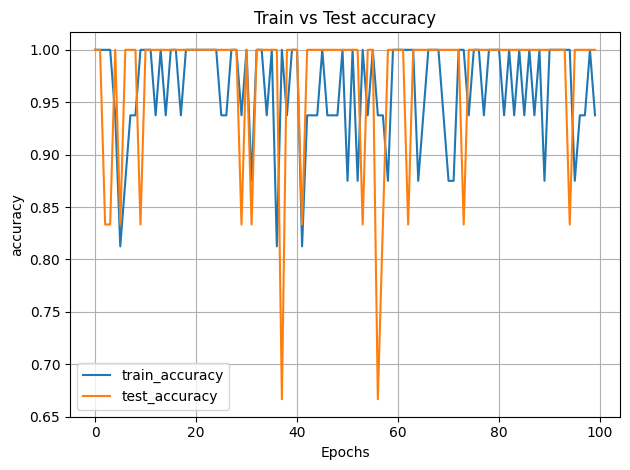

In [37]:
plt.title('Train vs Test accuracy')
plt.plot(history['accuracy'], label = 'train_accuracy')
plt.plot(history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.tight_layout()
plt.grid(True)
plt.show()

In [43]:
# Move X_test to the same device as the model (GPU)
X_test = X_test.to(device)

# Make predictions
predicted = model(X_test)
predicted = torch.argmax(predicted, dim=1)
print("ACCURACY  # {} ".format(accuracy_score(predicted.cpu(), y_test)), '\n')
print("PRECISION # {} ".format(precision_score(predicted.cpu(), y_test, average='micro')), '\n')
print("RECALL    # {} ".format(recall_score(predicted.cpu(), y_test, average='micro')), '\n')
print("F1_SCORE  # {} ".format(f1_score(predicted.cpu(), y_test, average='micro')))


ACCURACY  # 1.0  

PRECISION # 1.0  

RECALL    # 1.0  

F1_SCORE  # 1.0 
